# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

# Solution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
data = pd.read_csv("/content/drive/MyDrive/PIAIC_Data/compresive_strength_concrete.csv")

In [3]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
data.info

<bound method DataFrame.info of       Cement (component 1)(kg in a m^3 mixture)  ...  Concrete compressive strength(MPa, megapascals) 
0                                         540.0  ...                                             79.99
1                                         540.0  ...                                             61.89
2                                         332.5  ...                                             40.27
3                                         332.5  ...                                             41.05
4                                         198.6  ...                                             44.30
...                                         ...  ...                                               ...
1025                                      276.4  ...                                             44.28
1026                                      322.2  ...                                             31.18
1027                                     

In [5]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
data[data.duplicated() == True]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [8]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [9]:
data.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":'Cement',
                               "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":'Blast_Furnace_Slag',
                               "Fly Ash (component 3)(kg in a m^3 mixture)":'Fly_Ash', "Water  (component 4)(kg in a m^3 mixture)": 'Water',
                               "Superplasticizer (component 5)(kg in a m^3 mixture)":'Superplasticizer',
                                "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":'Coarse-Aggregate',
                               "Fine Aggregate (component 7)(kg in a m^3 mixture)": 'Fine_Aggregate',
                                "Age (day)": "Age_day",
                        "Concrete_target ": 'Concrete_target'
                                
                               }, inplace=True )

In [10]:
data

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse-Aggregate,Fine_Aggregate,Age_day,"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [11]:
blast_mean = np.mean(data.Blast_Furnace_Slag)

In [12]:
fly_mean = np.mean(data.Fly_Ash)

In [13]:
superplastic_mean = np.mean(data.Superplasticizer)

In [14]:
data.Blast_Furnace_Slag=data.Blast_Furnace_Slag.mask(data.Blast_Furnace_Slag==0).fillna(blast_mean)

In [15]:
data.Fly_Ash=data.Fly_Ash.mask(data.Fly_Ash==0).fillna(fly_mean)

In [16]:
data.Superplasticizer=data.Superplasticizer.mask(data.Superplasticizer==0).fillna(superplastic_mean)

In [17]:
data

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse-Aggregate,Fine_Aggregate,Age_day,"Concrete compressive strength(MPa, megapascals)"
0,540.0,73.895825,54.18835,162.0,2.50000,1040.0,676.0,28,79.99
1,540.0,73.895825,54.18835,162.0,2.50000,1055.0,676.0,28,61.89
2,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,270,40.27
3,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,365,41.05
4,198.6,132.400000,54.18835,192.0,6.20466,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.30000,179.6,8.90000,870.1,768.3,28,44.28
1026,322.2,73.895825,115.60000,196.0,10.40000,817.9,813.4,28,31.18
1027,148.5,139.400000,108.60000,192.7,6.10000,892.4,780.0,28,23.70
1028,159.1,186.700000,54.18835,175.6,11.30000,989.6,788.9,28,32.77


In [18]:
y = data['Concrete compressive strength(MPa, megapascals) ']

In [19]:
x = data.drop(columns='Concrete compressive strength(MPa, megapascals) ')

In [20]:
x

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse-Aggregate,Fine_Aggregate,Age_day
0,540.0,73.895825,54.18835,162.0,2.50000,1040.0,676.0,28
1,540.0,73.895825,54.18835,162.0,2.50000,1055.0,676.0,28
2,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,270
3,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,365
4,198.6,132.400000,54.18835,192.0,6.20466,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.30000,179.6,8.90000,870.1,768.3,28
1026,322.2,73.895825,115.60000,196.0,10.40000,817.9,813.4,28
1027,148.5,139.400000,108.60000,192.7,6.10000,892.4,780.0,28
1028,159.1,186.700000,54.18835,175.6,11.30000,989.6,788.9,28


In [21]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

In [ ]:
# Split data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
X_train

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse-Aggregate,Fine_Aggregate,Age_day
196,194.7,73.895825,100.50000,165.6,7.50000,1006.4,905.9,28
631,325.0,73.895825,54.18835,184.0,6.20466,1063.0,783.0,7
81,318.8,212.500000,54.18835,155.7,14.30000,852.1,880.4,3
526,359.0,19.000000,141.00000,154.0,10.90000,942.0,801.0,3
830,162.0,190.000000,148.00000,179.0,19.00000,838.0,741.0,28
...,...,...,...,...,...,...,...,...
87,286.3,200.900000,54.18835,144.7,11.20000,1004.6,803.7,3
330,246.8,73.895825,125.10000,143.3,12.00000,1086.8,800.9,14
466,190.3,73.895825,125.20000,166.6,9.90000,1079.0,798.9,100
121,475.0,118.800000,54.18835,181.1,8.90000,852.1,781.5,28


In [24]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

In [26]:
X_train.shape

(576, 8)

In [27]:
X_val.shape

(145, 8)

In [28]:
X_test.shape

(309, 8)

In [29]:
#Normalization of Data

In [30]:
mean = X_train.mean(axis=0)

In [31]:
std = X_train.std(axis=0)

In [32]:
X_train -= mean

In [33]:
X_train /= std

In [34]:
X_test -= mean

In [35]:
X_test /= std

In [36]:
X_val -= mean

In [37]:
X_val /= std

In [38]:
X_train

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse-Aggregate,Fine_Aggregate,Age_day
540,1.766666,-0.564748,-0.718373,0.465212,-0.522850,-0.454873,-0.727662,-0.675239
799,2.320631,-0.564748,-0.718373,-0.427040,-0.522850,1.971283,-1.977749,-0.675239
555,-0.985614,2.622251,-0.718373,0.169360,-0.522850,0.524328,-0.701198,-0.268145
415,-0.356865,-0.564748,0.351216,0.455820,-0.747562,-0.291673,1.099582,-0.675239
329,-0.386410,-0.564748,1.108737,-1.821772,0.916677,1.480398,0.390107,-0.675239
...,...,...,...,...,...,...,...,...
561,1.000348,-0.564748,-0.718373,0.169360,-0.522850,0.886709,-0.449165,-0.268145
522,-0.042951,-1.508423,1.518416,-0.145276,-0.697884,-1.665381,0.391368,0.187801
126,1.258865,-0.045543,-0.718373,-1.342774,2.034450,-1.535592,1.476373,-0.268145
214,-0.908059,-0.564748,1.111313,-0.948304,0.395050,1.497103,0.411530,-0.675239


In [39]:
network = Sequential()

In [40]:
network.add(layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],)))

In [41]:
network.add(layers.Dense(4, activation='relu'))

In [42]:
network.add(layers.Dense(1))

In [43]:
network.compile(optimizer='adam', loss='mse', metrics='mae')

In [44]:
history = network.fit(X_train, Y_train, batch_size=30, verbose=0, epochs=100, validation_data=(X_val, Y_val))

In [45]:
train_loss = history.history['loss']

In [46]:
val_loss = history.history['val_loss']

In [47]:
epochs = range(1, 101)

In [48]:
print('Training Loss: ' + str(train_loss[-1]))
print('---------------------')
print('Validation Loss' + str(val_loss[-1]))

Training Loss: 146.82284545898438
---------------------
Validation Loss145.13368225097656


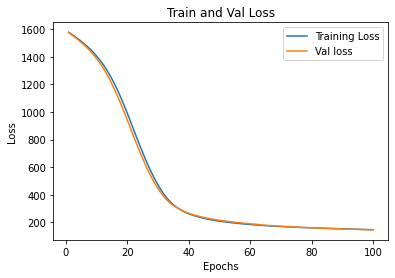

In [52]:
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Train and Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
mae_train = history.history['mae']

In [54]:
mae_val= history.history['val_mae']

In [55]:
print('Training Loss: ' + str(mae_train[-1]))
print('------------------')
print('Validation Loss' + str(mae_val[-1]))

Training Loss: 9.789569854736328
------------------
Validation Loss9.819921493530273


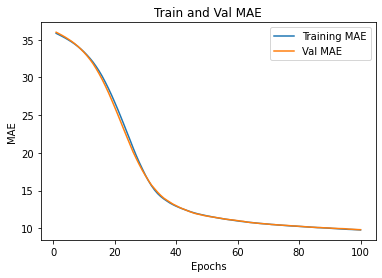

In [56]:
plt.plot(epochs, mae_train, label='Training MAE')
plt.plot(epochs, mae_val, label='Val MAE')
plt.title('Train and Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [57]:
prediction = network.predict(X_test)

In [58]:
network.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 146.0890 - mae: 9.9515


[146.0890350341797, 9.951465606689453]